In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goldpriceyahoo/MonthWise2022(Yahoo).csv
/kaggle/input/goldpriceyahoo/DateWiseDec2022(Yahoo).csv


In [2]:
class Linear_Regression():
  # Initiating Parameters(learning_rate,no_of_iterations)
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):
  # No_of_training_example(No of data points) and number of features()
    self.m,self.n = X.shape #no of rows and colomn
  # Initiating weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

  # Implementing Gradient Decent
    for i in range(self.no_of_iterations):
      self.updateWeight()



  def updateWeight(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
  
  def predict(self,X):
    return X.dot(self.w) + self.b

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
# Gold Rate Data
goldMonth = pd.read_csv('/kaggle/input/goldpriceyahoo/MonthWise2022(Yahoo).csv')

In [5]:
goldMonth.head()

,Month,Price
0,1,1795.0
1,2,1899.4
2,3,1949.2
3,4,1909.3
4,5,1804.1


In [6]:
goldMonth.shape

(11, 2)

In [7]:
# Split In X and Y (Feature V/S Target)
X = goldMonth.iloc[:,:-1].values
Y = goldMonth.iloc[:,1].values

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [9]:
Y

array([1795. , 1899.4, 1949.2, 1909.3, 1804.1, 1762.9, 1712.8, 1662.4,
       1635.9, 1746. , 1819.7])

In [10]:
model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)

In [11]:
model.fit(X,Y)

In [12]:
# print the parameters

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  -14.938759512448184
bias =  1874.7281798430427


In [13]:
test_data_prediction = model.predict(X)

In [14]:
print(test_data_prediction)

[1859.78942033 1844.85066082 1829.91190131 1814.97314179 1800.03438228
 1785.09562277 1770.15686326 1755.21810374 1740.27934423 1725.34058472
 1710.40182521]


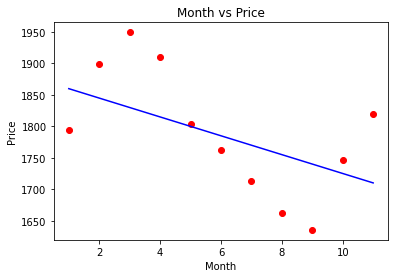

In [15]:
plt.scatter( X, Y, color = 'red' )
plt.plot( X, test_data_prediction, color = 'blue' )    
plt.xlabel( 'Month' )
plt.ylabel( 'Price' )
plt.title( 'Month vs Price' )
plt.show()